In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("loan.csv")
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [166]:
#train[(train['ApplicantIncome']>2877) & (train['ApplicantIncome']<5795) ].count()

In [7]:
train.max()

Loan_ID                  LP002990
Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome           41667
LoanAmount                    700
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
Loan_Status                     Y
dtype: object

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.notnull().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

With Outlier's

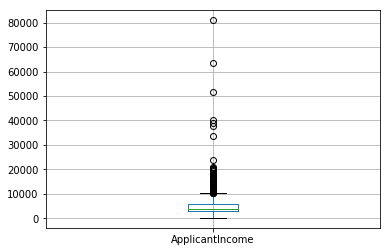

In [10]:
train.boxplot(column='ApplicantIncome')

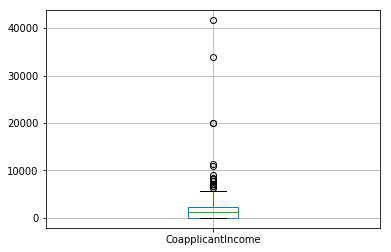

In [11]:
train.boxplot('CoapplicantIncome')

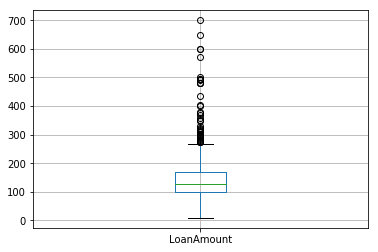

In [12]:
train.boxplot('LoanAmount')

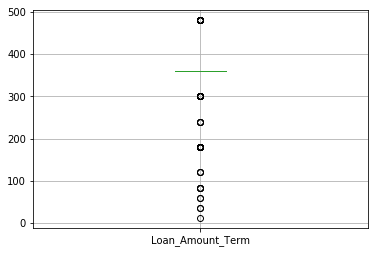

In [13]:
train.boxplot('Loan_Amount_Term')

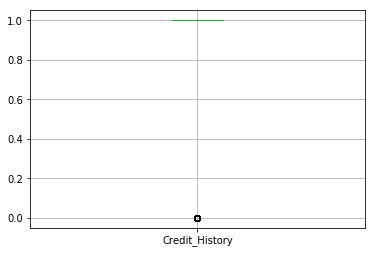

In [14]:
train.boxplot('Credit_History')

Removing Outliers

In [15]:
train['ApplicantIncome']=train.ApplicantIncome.apply(lambda x: 5403 if x >5795 else x)
train['ApplicantIncome']=train.ApplicantIncome.apply(lambda x: 2877 if x <2877 else x)

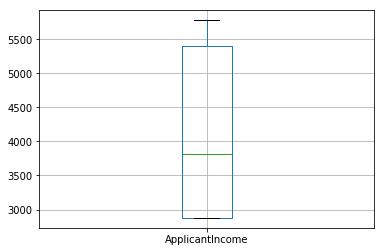

In [16]:
train.boxplot(column='ApplicantIncome')

In [147]:
train['CoapplicantIncome']=train.CoapplicantIncome.apply(lambda x: 1621 if x >2297 else x)

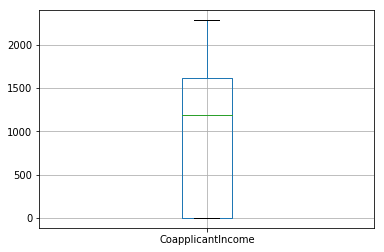

In [18]:
train.boxplot('CoapplicantIncome')

In [19]:
train['LoanAmount']=train.LoanAmount.apply(lambda x: 146 if x >168 else x)
train['LoanAmount']=train.LoanAmount.apply(lambda x: 100 if x <100 else x)

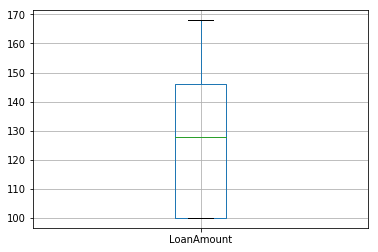

In [20]:
train.boxplot('LoanAmount')

In [21]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['Gender'].fillna('Male', inplace=True)
train['Married'].fillna('Yes', inplace=True)
train['Dependents'].fillna(0,inplace=True)
train['Self_Employed'].fillna('No',inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
train['Credit_History'].fillna(1,inplace=True)


In [22]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
train.Gender.value_counts()
Gender_Male=pd.get_dummies(train['Gender'],prefix='Gender').Gender_Male

In [25]:
Married_Yes=pd.get_dummies(train['Married'],prefix='Married').Married_Yes
Self_Employed=pd.get_dummies(train['Self_Employed'],prefix='Self_Employed').Self_Employed_No
Property_Area_Semiurban=pd.get_dummies(train['Property_Area'],prefix='Property_Area').Property_Area_Semiurban
Property_Area_Urban=pd.get_dummies(train['Property_Area'],prefix='Property_Area').Property_Area_Urban
Loan_Status_Y=pd.get_dummies(train['Loan_Status'],prefix='Loan_Status').Loan_Status_Y
Education_Grad=pd.get_dummies(train['Education'],prefix='Education').Education_Graduate

In [27]:
trainNew=pd.concat([train,Gender_Male,Married_Yes,Self_Employed,Education_Grad,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y],axis='columns')

In [28]:
trainNew.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_No,Education_Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,Male,No,0,Graduate,No,5403,0.0,126.103041,360.0,1.0,Urban,Y,1,0,1,1,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,1,1,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,100.000000,360.0,1.0,Urban,Y,1,1,0,1,0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2877,1621.0,120.000000,360.0,1.0,Urban,Y,1,1,1,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,5403,0.0,141.000000,360.0,1.0,Urban,Y,1,0,1,1,0,1,1


In [29]:
trainNew.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Male', 'Married_Yes', 'Self_Employed_No', 'Education_Graduate',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [30]:
featurecoulmn=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Male','Married_Yes','Self_Employed_No','Education_Graduate','Property_Area_Semiurban','Property_Area_Urban',]

In [31]:
featurecoulmn

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Male',
 'Married_Yes',
 'Self_Employed_No',
 'Education_Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [32]:
X=trainNew[featurecoulmn]
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_No,Education_Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5403,0.0,126.103041,360.0,1.0,1,0,1,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,1,0,0
2,3000,0.0,100.000000,360.0,1.0,1,1,0,1,0,1
3,2877,1621.0,120.000000,360.0,1.0,1,1,1,0,0,1
4,5403,0.0,141.000000,360.0,1.0,1,0,1,1,0,1


In [33]:
y=Loan_Status_Y

In [34]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8

# Import Libraries

In [66]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

# Split Train & Test Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.03,random_state=42)

In [144]:
X_train.shape

(595, 11)

In [145]:
X_test.shape

(19, 11)

# RandomForest

FitTarinData

In [99]:
#RandomForest
randForest = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
randForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Prediction

In [98]:
y_pred_RandomF  = randForest.predict(X_test)

AccuracyScore

In [148]:
randForestScore=metrics.accuracy_score(y_test,y_pred_RandomF)
%time print ("Random forest accuraccy score",randForestScore)

Random forest accuraccy score 0.8947368421052632
Wall time: 0 ns


# DecisionTree

FitTrainData

In [151]:
#Decision Tree
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Prediction

In [134]:
y_pred_decision_class  = decision.predict(X_test)



AccuracyScore

In [135]:
#decisionT=pd.DataFrame([y_test, y_pred_decision_class])
DecisionTreeScore=metrics.accuracy_score(y_test,y_pred_decision_class)
DecisionTreeScore

0.6842105263157895

# K -NN

FitTrainData

In [103]:
#KNN
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Predict

In [104]:
y_pred_KNN = classifier.predict(X_test)

AccuracyScore


In [129]:
#Y_Predict_test=pd.DataFrame(y_pred_KNN)
KNNScore=metrics.accuracy_score(y_test,y_pred_KNN)
KNNScore

0.8947368421052632

# LogisticRegression

FitTrainData

In [150]:
#LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predict

In [120]:
y_pred_model_class  = model.predict(X_test)

0.8947368421052632

AccuracyScore

In [130]:
#y_pred_model=pd.DataFrame(y_pred_model_class)
LogisticRegScore=metrics.accuracy_score(y_test,y_pred_model)
LogisticRegScore

0.8947368421052632

In [1]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 'LogisticRegScore', 
              'randForestScore', acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, 'DecisionTreeScore']})
models.sort_values(by='Score', ascending=False)

NameError: name 'pd' is not defined

# AccuarcyScore of Model's

In [149]:
randForestScore=metrics.accuracy_score(y_test,y_pred_RandomF)
%time print ("Random forest accuraccy score",randForestScore)
DecisionTreeScore=metrics.accuracy_score(y_test,y_pred_decision_class)
print ("Decision Tree accuraccy score",DecisionTreeScore)
%time KNNScore=metrics.accuracy_score(y_test,y_pred_KNN)
%time print ("K - NN accuraccy score",KNNScore)
LogisticRegScore=metrics.accuracy_score(y_test,y_pred_model)
%time print ("LogisticRegression accuraccy score",LogisticRegScore)

Random forest accuraccy score 0.8947368421052632
Wall time: 0 ns
Decision Tree accuraccy score 0.6842105263157895
Wall time: 0 ns
K - NN accuraccy score 0.8947368421052632
Wall time: 0 ns
LogisticRegression accuraccy score 0.8947368421052632
Wall time: 10 ms
